## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_mice = len(merged_df['Mouse ID'].unique())
number_mice

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df['Mouse ID'].isin(duplicate_mice)==False]

In [13]:
# Checking the number of mice in the clean DataFrame.
number_mice_cleaned = len(cleaned_df['Mouse ID'].unique())
number_mice_cleaned

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimens = cleaned_df.groupby('Drug Regimen')
summary_table = pd.DataFrame()

summary_table['Mean Tumor Volume'] = regimens['Tumor Volume (mm3)'].mean()
summary_table['Median Tumor Volume'] = regimens['Tumor Volume (mm3)'].median()
summary_table['Variance'] = regimens['Tumor Volume (mm3)'].var()
summary_table['Standard Deviation'] = regimens['Tumor Volume (mm3)'].std()
summary_table['SEM'] = regimens['Tumor Volume (mm3)'].sem()

summary_table


,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

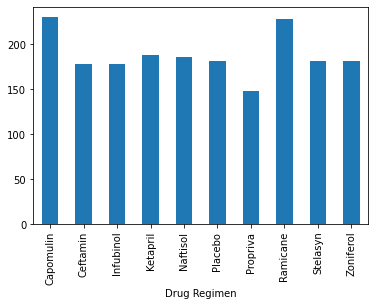

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

regimens_mice_count = regimens['Timepoint'].count()
mice_count_plot = regimens_mice_count.plot.bar(y='Timepoint')

Text(0.5, 0, 'Drug Regimen')

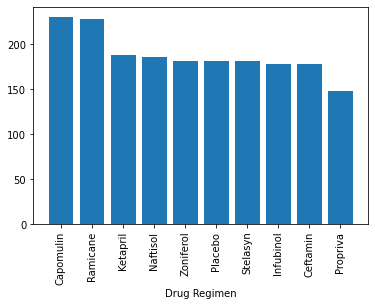

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_count = cleaned_df['Drug Regimen'].value_counts()
plt.bar(mice_count.index.values,mice_count.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")

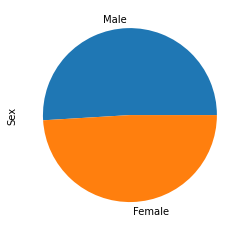

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_distribution = cleaned_df['Sex'].value_counts()
pie_plot = gender_distribution.plot.pie()

([<matplotlib.patches.Wedge at 0x7f9a30b02d68>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

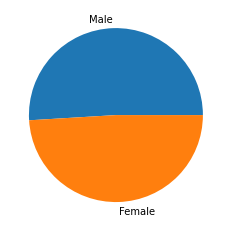

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = ['Male', 'Female']
plt.pie(gender_distribution, labels=genders)

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoints = last_timepoints.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df2 = last_timepoints.merge(cleaned_df,on = ['Mouse ID','Timepoint'],how = 'left')
merged_df2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    tumor_volume = merged_df2.loc[merged_df2['Drug Regimen']== drug, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volume)
    
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(drug, outliers)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumor Volume')

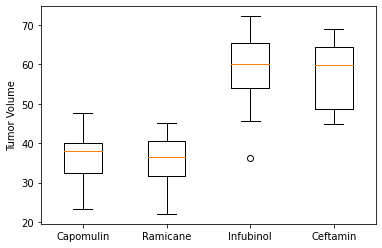

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_data, labels=treatments)
plt.ylabel('Tumor Volume')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

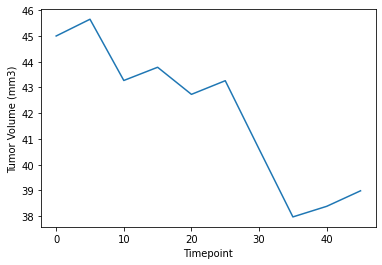

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_b128 = cleaned_df.loc[cleaned_df['Mouse ID']== 'b128']
timepoint_xaxis = mouse_b128['Timepoint']
volume_yaxis = mouse_b128['Tumor Volume (mm3)']

b128_plot = plt.plot(timepoint_xaxis, volume_yaxis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Avg Tumor Volume (mm3)')

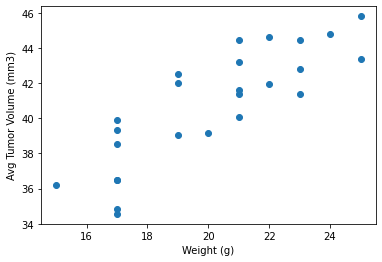

In [47]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = cleaned_df.loc[cleaned_df['Drug Regimen']== 'Capomulin']
capomulin_avg_tumor_vol = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'], capomulin_avg_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')


## Correlation and Regression

Correlation: 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

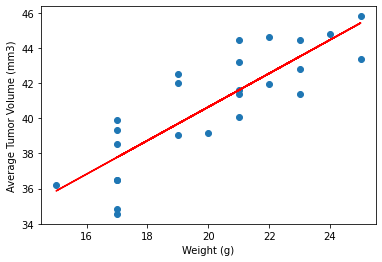

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_avg_tumor_vol['Weight (g)'],capomulin_avg_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f"Correlation: {corr}")
model = st.linregress(capomulin_avg_tumor_vol['Weight (g)'],capomulin_avg_tumor_vol['Tumor Volume (mm3)'])
y_values = capomulin_avg_tumor_vol['Weight (g)'] * model[0] + model[1]

plt.scatter(capomulin_avg_tumor_vol['Weight (g)'],capomulin_avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(capomulin_avg_tumor_vol['Weight (g)'], y_values, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')